# Tutorial for building a cathode to liquid electrolyte interface

In [1]:
from elecChemDev.search import elode
db1 = elode('../api.key')
db1.df

Retrieving MaterialsDoc documents:   0%|          | 0/11 [00:00<?, ?it/s]

,elemComb,natoms,formula,mass,charge,mpid,Atoms
hash,,,,,,,
339a0bce53d7acc7480b6d06fc5235c2,CoLiMnNiO,12,CoLi3MnNiO6,289.378638,0,mp-1222510,"(Atom('Li', [-2.9526581628120003, 3.347366, 2...."
56ee4840094949461cea63a492c20846,CoLiMnNiO,16,Co2Li4MnNiO8,387.249832,0,mp-1222625,"(Atom('Li', [0.0, 4.258594146476, 2.5409387921..."
1f1e7115dac7bcfed60aca101a8cc141,CoLiMnNiO,16,Co2Li4MnNiO8,387.249832,0,mp-1222609,"(Atom('Li', [0.0, 4.351983532008, 2.4974363328..."
a66974b1c583da6de88000b25405fba5,CoLiMnNiO,16,Co2Li4MnNiO8,387.249832,0,mp-1222620,"(Atom('Li', [5.2825800253231134e-17, 9.8739170..."
751f1d4d97a77ff9affdb09ee1a60778,CoLiMnNiO,16,Co2Li4MnNiO8,387.249832,0,mp-1222664,"(Atom('Li', [0.018138514589999998, 2.445724433..."
475995fa29d03b3388de6d8b0b5790fd,CoLiMnNiO,20,CoLi5Mn2Ni2O10,480.886082,0,mp-1222667,"(Atom('Li', [-0.8418647943950002, 4.3559932867..."
e60808d41610b0cf53ec70eafc2a4c37,CoLiMnNiO,28,Co2Li4Mn3Ni3O16,742.504720,0,mp-867541,"(Atom('Li', [-0.08497553617900033, 3.274591143..."
d3da18e4433c10bead049901ab976203,CoLiMnNiO,28,Co3Li4Mn3Ni2O16,742.744514,0,mp-758046,"(Atom('Li', [-9.703237472535875e-17, 6.5957560..."
033d7c0d675d0ddc22530dcbcb5ad189,CoLiMnNiO,28,Co3Li4Mn2Ni3O16,746.499870,0,mp-776416,"(Atom('Li', [-0.07765401165800002, 3.222240106..."


# Prepare cathode surface

In [21]:
from collections import Counter

config = db1.get_material('1830e1fe5d70c08446c2cb905938e922', 'Atoms')
# config = db1.get_material('e60808d41610b0cf53ec70eafc2a4c37', 'Atoms')
c = Counter(config.get_chemical_symbols())
print('NMC', c['Ni'], c['Mn'], c['Co'], 'Li', c['Li'], 'O', c['O'])

NMC 3 3 2 Li 10 O 16


In [22]:
from elecChemDev.view import view_atoms
from ase.build import surface
from ase.io import write

L = 3
large_cell  = config.repeat([1,3,2])
Vfill = large_cell.get_volume()
cathode = surface(large_cell, (1, 0, 0), layers=L, vacuum=20.0)
Vacuum = cathode.get_volume() - Vfill*L
cathode.pbc = True
view_atoms(cathode)


NGLWidget()

# Prepare electrolyte molecules

In [23]:
from elecChemDev.search import elyte
db2 = elyte('../api.key')

Retrieving MoleculesDoc documents:   0%|          | 0/24989 [00:00<?, ?it/s]

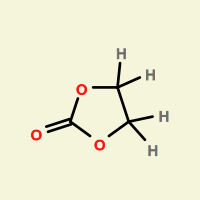

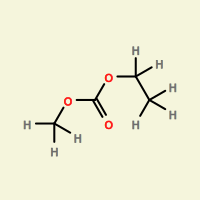

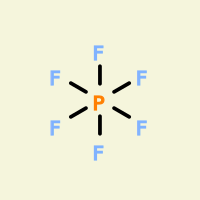

In [24]:
sel_molecs = ['02cd3adb17e5c150e105cce7efa6a464', '5ac14b0150f720ec0b3c723645eebe66', '85d223581769d2d337d38c1e8617f696']
db2.show_pics(sel_molecs)

In [25]:
from ase import Atoms
mols = db2.get_molecs(sel_molecs, field='Atoms')
mols.append(Atoms('Li'))

# Solvate cathode in electrolyte at desired composition and density

In [26]:
from elecChemDev.build import fill_mols

dens = 0.7 #g/cm3
Nratio = [3,3,1,1]

interface = fill_mols(cathode, mols, Nratio, Vacuum, dens, distance=2.3, Nattempts=200, fct={'Li':0.1})

100%|██████████| 64/64 [01:15<00:00,  1.18s/it]


In [27]:
view_atoms(interface)

NGLWidget()